In [3]:
import pickle
import numpy as np
import torch
import torchvision
from torchvision import datasets, models, transforms
from tqdm.notebook import tqdm

# Zadanie
Proszę nauczyć trzy model 
- VAE
- WAE
- DCGAN

Na danych Fesion MINST 


1. Maksymalnie uczymy 5 epok
2. Liczymy FID


Klasa ,,*AverageMeter*'' przechowuje oraz przetwarza częściowe wyniki zapisywane w poszczegółnych etapach uczenia modelu. Funkcja ,,*count_parameters*'' zlicza liczbę parametrów sieci, zaś funkcja ,,*show*'' rysuje obrazki ze zbioru danych i ich rekonstrukcje.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2.5)
sns.set_style("whitegrid")


class AverageMeter:
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum = self.sum + val * n
        self.count = self.count + n
        self.avg = self.sum / self.count


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def show(img, recon_img, num_col=None):
    if recon_img is None:
        rec_images = img
    else:
        n = img.shape[0]
        assert n >= num_col
        rec_images = torch.empty((2 * num_col, *img.shape[1:]))
        rec_images.data[:num_col] = img.data[:num_col]
        rec_images.data[num_col:] = recon_img.data[:num_col]

    plt.figure(figsize=[16, 8])
    grid = torchvision.utils.make_grid(
        rec_images, nrow=num_col, padding=1, normalize=True, scale_each=True
    )
    np_grid = grid.cpu().numpy()
    plt.axis("off")
    plt.imshow(np.transpose(np_grid, (1, 2, 0)), interpolation="nearest")

In [6]:
root = "/datasets"
download = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"{device=}")

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = torchvision.datasets.FashionMNIST(
    root, download=download, train=True, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=False
)

test_dataset = torchvision.datasets.FashionMNIST(
    root, download=download, train=False, transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=200, shuffle=False, num_workers=4, pin_memory=False
)

device=device(type='cpu')



Extracting /datasets\FashionMNIST\raw\train-images-idx3-ubyte.gz to /datasets\FashionMNIST\raw




Extracting /datasets\FashionMNIST\raw\train-labels-idx1-ubyte.gz to /datasets\FashionMNIST\raw




Extracting /datasets\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to /datasets\FashionMNIST\raw




Extracting /datasets\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to /datasets\FashionMNIST\raw



C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


tensor(7)


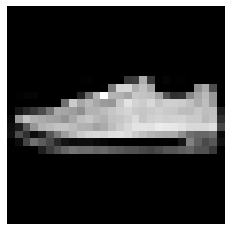

In [19]:
index = 3
image, label = next(iter(train_loader))
plt.axis("off")
plt.imshow(image[index,:,:].squeeze(), cmap="gray")
print(label[index])